In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import pickle
from data_analysis_blocked import *

In [2]:
def jacknife(data,f):
    N = len(data)
    err = 0
    bias = 0
    data_f = f(data)
    for i in range(N):
        d = data.pop(i)
        omit_f = f(data)
        err = np.add(err, (N-1)/N*np.subtract(data_f,omit_f)**2)
        bias = np.add(bias,np.divide(omit_f,N))
        data.insert(i, d)
    err = np.power(err,0.5)
    return [np.add(data_f,np.multiply(N-1,np.subtract(data_f,bias))), err]

def get_obs_avg(data, cutoff=0, corr_dist=1):
    avg = np.mean([data[i] for i in range(cutoff, len(data), corr_dist)])
    err = np.std([data[i] for i in range(cutoff, len(data), corr_dist)])/((len(data)-cutoff)/corr_dist)**0.5
    return [avg, err]

def get_obs_avg_jacknife(data, cutoff=0, corr_dist=1):
    return jacknife([data[i] for i in range(cutoff, len(data), corr_dist)], np.mean)

# Load Data

Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-13_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-16_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-17_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-19_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-20_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-23_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-24_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-25_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-26_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-29_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_100

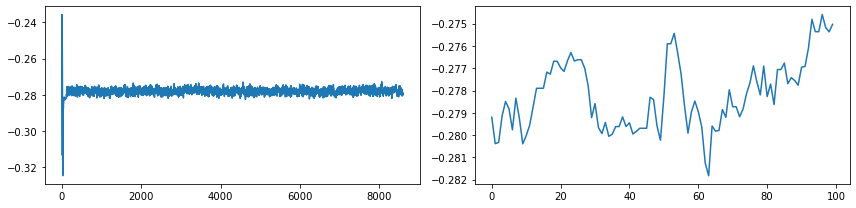

In [8]:
# Extent of the lattice
Nx = 16
Nt = 128
# Spacial volume of the lattice
Vx = Nx**3

version = "3-1"

# The number of trajectories until thermalization
cutoff = 3000
block_size = 100

m_sq = -1050.0
lmbd = 10000.0
alpha = 0.05

# Load data
data = LatticeData(Nx, Nt, m_sq, lmbd, alpha, version, cutoff, block_size)
data.load_all_data()

phi_list = data.phi_list
phi_sq_dist = data.phi_sq_dist
phi_i_dist = data.phi_i_dist
theta_dist = data.theta_dist
psq_dist_center = data.psq_dist_center
phi_dist_center = data.phi_dist_center
psq_list = data.psq_list

step_size = psq_dist_center/32.0

# Plot an observable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
axes[0].plot([phi_list[i][0] for i in range(0,len(phi_list))])
axes[1].plot([phi_list[i][0] for i in range(cutoff,cutoff+100)])

plt.tight_layout()
plt.show()

In [57]:
end=len(phi_list)
vev_phi0, vev_phi0_err = get_obs_avg_jacknife([phi_list[i][0] for i in range(end)], cutoff, block_size)
print(f"Vacuum Expectation Value of phi_0           = {vev_phi0} +- {vev_phi0_err}")
vev_phii, vev_phii_err = get_obs_avg_jacknife([np.mean([phi_list[i][1],phi_list[i][2],phi_list[i][3]]) for i in range(len(phi_list))], cutoff, block_size)
print(f"Vacuum Expectation Value of phi_i           = {vev_phii} +- {vev_phii_err}")
vev_phisq, vev_phisq_err = get_obs_avg_jacknife([psq_list[i] for i in range(len(psq_list))], cutoff, block_size)
print(f"Vacuum Expectation Value of phi^2           = {vev_phisq} +- {vev_phisq_err}")

Vacuum Expectation Value of phi_0           = -0.059716133661636604 +- 0.0010706389434940616
Vacuum Expectation Value of phi_i           = 6.535990670745351e-05 +- 0.0005266737656640495
Vacuum Expectation Value of phi^2           = 0.5938345356408226 +- 3.43214619189146e-05


In [58]:
print(f"phi dist center = {phi_dist_center}")
print(f"psq dist center = {psq_dist_center}")

phi dist center = 0.32514890983964956
psq dist center = 0.5942420010528856


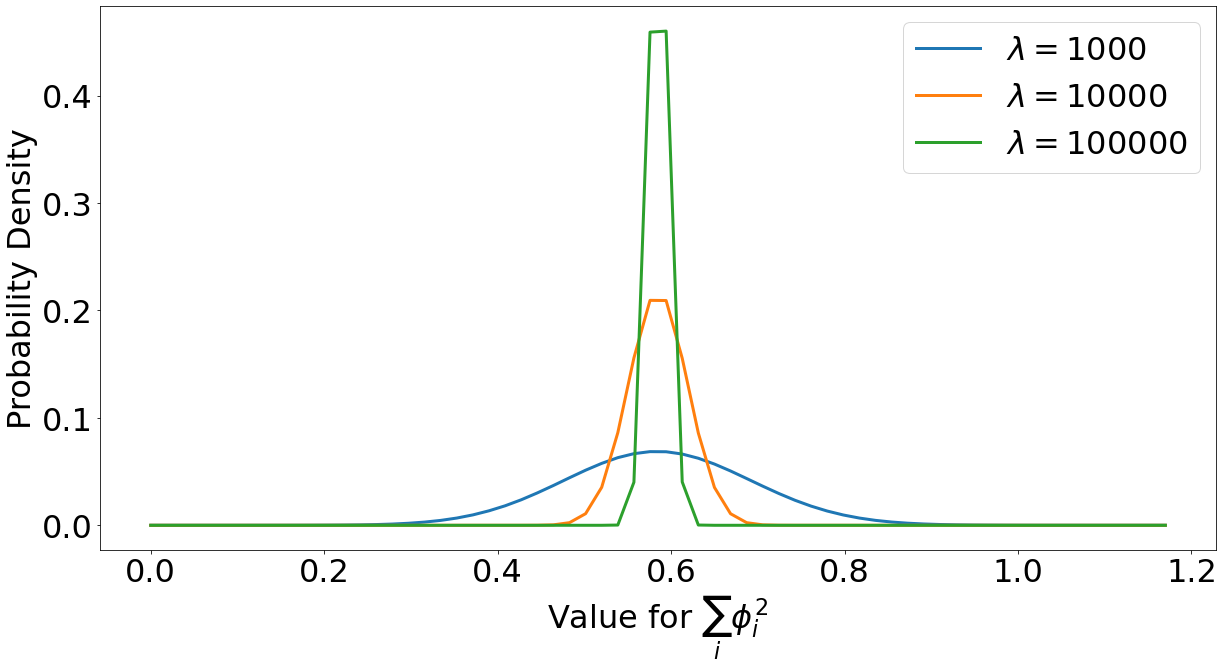

In [71]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 32}
plt.rc('font', **font)

fig,ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)

step_size = psq_dist_center/32.0
ax.plot(np.multiply(range(64),step_size),np.multiply(phi_sq_dist[-64:], 1/np.sum(phi_sq_dist[-64:])), label="$\lambda=1000$", linewidth=3)
ax.plot(np.multiply(range(64),step_size),np.multiply(phi_sq_dist_10000[-64:], 1/np.sum(phi_sq_dist_10000[-64:])), label="$\lambda=10000$", linewidth=3)
ax.plot(np.multiply(range(64),step_size),np.multiply(phi_sq_dist_100000[-64:], 1/np.sum(phi_sq_dist_100000[-64:])), label="$\lambda=100000$", linewidth=3)

ax.set_xlabel("Value for $\sum_i\phi_i^2$")
ax.set_ylabel("Probability Density")

ax.legend()

fig.savefig("phi_sq_dist.png")

#plt.vlines([vev_phi0[i]**2], 0, np.max(10))
#print(phi_sq_dist)

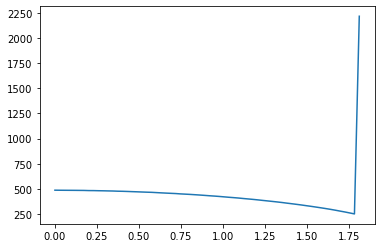

In [19]:
step_size = 2*phi_dist_center/32.0
plt.plot(np.multiply(range(64),step_size),phi_i_dist)
#plt.vlines([vev_phi0[i]**2], 0, np.max(10))

(995.0673751831055, 2754.9326248168945)

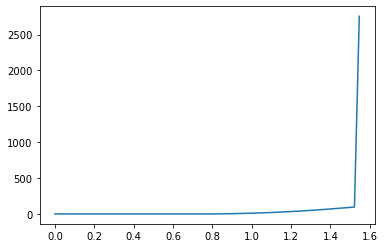

In [8]:
x = np.multiply(range(64),np.pi/4.0/32.0)
plt.plot(x,np.divide(theta_dist,np.power(np.sin(x+np.pi/4/64),2)))
np.sum(theta_dist[:-1]), theta_dist[-1]

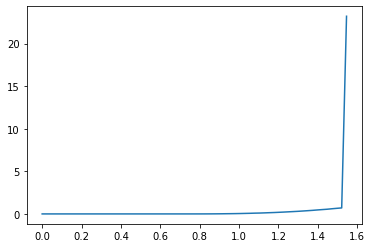

In [12]:
x = np.multiply(range(64),np.pi/4.0/32.0)
plt.plot(x,theta_dist)

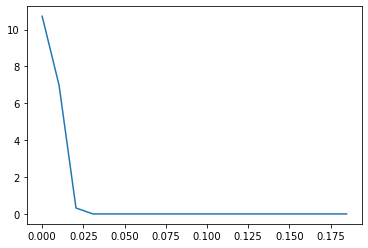

In [18]:
step_size = np.abs(vev_phi0)/32.0
plt.plot(np.multiply(range(64),step_size)[:int(.2/step_size)],np.divide(phi_i_dist[:int(.2/step_size)],step_size*3))
#plt.vlines(-vev_phi0, 0, np.max(phi_i_dist))

# $\lambda$/$m^2$ = 4

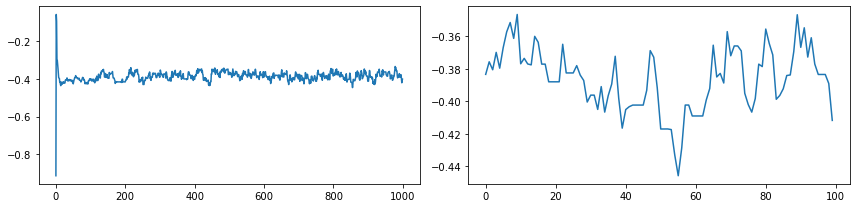

In [11]:
# Extent of the lattice
Nx = 8
Nt = 16
# Spacial volume of the lattice
Vx = Nx**3

date = "2022-09"
day = "07"

# The number of trajectories until thermalization
cutoff = 800
# The correlation distance of the trajectories
corr_dist = 5

phi_list=[0]*4
phi_sq_dist=[0]*4
phi_i_dist=[0]*4
theta_dist=[0]*4
for i in range(4):
    # The parameters in the action
    m_sq = -.5*4**i
    lmbd = 2.0*4**i
    alpha = 0.1
    # Load the data
    with open(f"sigma_pion_corrs_{Nx}x{Nt}_msq_{m_sq}_lmbd_{lmbd}_alph_{alpha}_{date}-{day}.bin","rb") as input:
        data = pickle.load(input)
    [phi_list[i],phi_sq_dist[i],phi_i_dist[i],theta_dist[i]] = [data["phi_list"],data["phi_sq_dist"],data["phi_i_dist"],data["theta_dist"]]

# Plot an observable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
axes[0].plot([phi_list[2][i][0] for i in range(0,len(phi_list[2]))])
axes[1].plot([phi_list[2][i][0] for i in range(cutoff,cutoff+100)])

plt.tight_layout()
plt.show()

In [12]:
end=len(phi_list[0])
vev_phi0=[0]*4
vev_phi0_err=[0]*4
for j in range(4):
    vev_phi0[j], vev_phi0_err[j] = get_obs_avg_jacknife([phi_list[j][i][0] for i in range(end)], cutoff, corr_dist)
    print(f"Vacuum Expectation Value of phi_0           = {vev_phi0[j]} +- {vev_phi0_err[j]}")

Vacuum Expectation Value of phi_0           = -0.5640915224729052 +- 0.005403627704815304
Vacuum Expectation Value of phi_0           = -0.35657002482898376 +- 0.00456255649623262
Vacuum Expectation Value of phi_0           = -0.3854062154528677 +- 0.0034387817279920353
Vacuum Expectation Value of phi_0           = -0.5813477769216587 +- 0.0014396855821191274


<ErrorbarContainer object of 3 artists>

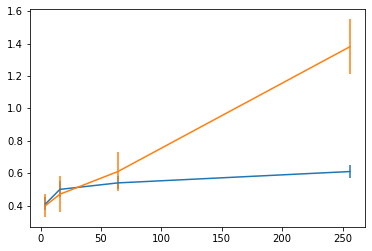

In [13]:
ls = [4,4*4,4*4**2,4*4**3]
pi_mass = [.41,.50,.54,.61]
pi_mass_err = [.04,.05,.04,.04]
s_mass = [.40,.47,.61,1.38]
s_mass_err = [.07,.11,.12,.17]
plt.errorbar(ls,pi_mass,yerr=pi_mass_err)
plt.errorbar(ls,s_mass,yerr=s_mass_err)

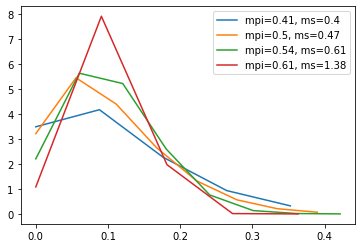

In [14]:
for i in range(4):
    step_size = np.abs(vev_phi0[i])*5.0/32.0
    plt.plot(np.multiply(range(64),step_size)[:int(.5/step_size)],np.divide(phi_sq_dist[i][:int(.5/step_size)],step_size), label=f"mpi={pi_mass[i]}, ms={s_mass[i]}")
    plt.legend()
    #plt.vlines([vev_phi0[i]**2], 0, np.max(8))

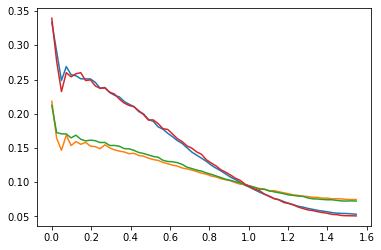

In [15]:
x = np.multiply(range(64),np.pi/4.0/32.0)
for i in range(4):
    plt.plot(x,np.divide(theta_dist[i],np.power(np.sin(x+np.pi/4/64),2)))